Reference: https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm#step-4-post-process-return-result-in-classical-format

environment variables: https://dev.to/jakewitcher/using-env-files-for-environment-variables-in-python-applications-55a1

In [6]:
# Installs the latest version of the Qiskit meta-package.
!pip install -q qiskit -U
!pip install -q qiskit_optimization
!pip install -q qiskit-ibm-runtime -U
!pip install -q python-dotenv
!pip install -q yfinance
!pip install -q qiskit_finance
!pip install -q docplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 24.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements 

In [8]:
import yfinance as yf
nifty_50_symbols = [    "ADANIPORTS.NS",    "ASIANPAINT.NS",    "AXISBANK.NS",    "BAJAJ-AUTO.NS",    "BAJFINANCE.NS",    "BAJAJFINSV.NS",    "BHARTIARTL.NS",    "BPCL.NS",    "BRITANNIA.NS",    "CIPLA.NS",   "COALINDIA.NS",    "DIVISLAB.NS",    "DRREDDY.NS",
    "EICHERMOT.NS",    "GRASIM.NS",    "HCLTECH.NS",    "HDFCBANK.NS",    "HDFCBANK.NS",    "HDFCLIFE.NS",    "HEROMOTOCO.NS",    "HINDALCO.NS",    "HINDUNILVR.NS",    "ICICIBANK.NS",    "INDUSINDBK.NS",    "INFY.NS",    "IOC.NS",    "ITC.NS",    "JSWSTEEL.NS",    "KOTAKBANK.NS",
    "LT.NS",     "M&M.NS",    "MARUTI.NS",    "NESTLEIND.NS",    "NTPC.NS",    "ONGC.NS",    "POWERGRID.NS",    "RELIANCE.NS",    "SHREECEM.NS",    "SUNPHARMA.NS",    "TATACONSUM.NS",    "TATAMOTORS.NS",    "TATASTEEL.NS",    "TECHM.NS",
    "TITAN.NS",    "ULTRACEMCO.NS",    "UBL.NS",    "WIPRO.NS", 'SBIN.NS', "TCS.NS" ]
print(len(nifty_50_symbols))
start_date = "2021-02-01"
# end_date = "2024-02-26"

data = yf.download(nifty_50_symbols, start= start_date)['Adj Close']
data.to_csv("stock_closing_prices.csv")

49


[*********************100%%**********************]  48 of 48 completed


In [2]:
import pandas as pd
import datetime

# Define start and end dates
start_date = datetime.date(2023, 2, 1)
end_date = datetime.date(2024, 2, 26)

# Read the CSV file
stock_closing_prices_3y = pd.read_csv('stock_closing_prices.csv')

# Convert 'Date' column to datetime format
stock_closing_prices_3y['Date'] = pd.to_datetime(stock_closing_prices_3y['Date'])

# Set 'Date' column as the index
stock_closing_prices_3y = stock_closing_prices_3y.set_index('Date')
assets = ['BHARTIARTL.NS', 'HDFCBANK.NS','HINDUNILVR.NS','ICICIBANK.NS','INFY.NS','ITC.NS','LT.NS','RELIANCE.NS','SBIN.NS','TCS.NS']
# Filter DataFrame rows based on date range
closing_prices_df = stock_closing_prices_3y.loc[start_date:end_date]
closing_prices_df = closing_prices_df[assets]
# Print the filtered DataFrame
print(closing_prices_df)

            BHARTIARTL.NS  HDFCBANK.NS  HINDUNILVR.NS  ICICIBANK.NS  \
Date                                                                  
2023-02-01     765.583313  1609.097046    2534.804688    841.027283   
2023-02-02     774.193787  1585.171387    2594.476074    850.896057   
2023-02-03     789.274536  1639.992798    2608.163086    856.747803   
2023-02-06     785.641174  1633.022705    2597.184082    846.730286   
2023-02-07     782.306519  1635.444824    2561.341797    845.788086   
...                   ...          ...            ...           ...   
2024-02-20    1143.949951  1454.300049    2404.100098   1048.750000   
2024-02-21    1139.900024  1439.150024    2407.100098   1051.949951   
2024-02-22    1135.550049  1419.550049    2388.100098   1062.699951   
2024-02-23    1125.750000  1420.599976    2394.100098   1061.300049   
2024-02-26    1110.050049  1422.300049    2404.250000   1054.199951   

                INFY.NS      ITC.NS        LT.NS  RELIANCE.NS     SBIN.NS  \

## Authenticaion and token

In [9]:
from dotenv import load_dotenv
import os

ModuleNotFoundError: No module named 'dotenv'

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token='IBM_Token')

# import section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import yfinance as yf
import time
from qiskit_optimization.converters import LinearEqualityToPenalty
from qiskit_optimization import QuadraticProgram
from qiskit.result import QuasiDistribution
from qiskit import QuantumCircuit, transpile

from qiskit_optimization.converters.quadratic_program_to_qubo import (
    QuadraticProgramToQubo,
)
from qiskit_optimization.translators import from_docplex_mp
from scipy.optimize import minimize
from docplex.mp.model import Model
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp

import time
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, QAOA, SamplingVQE
from qiskit_algorithms.minimum_eigensolvers import VQE, SamplingVQE
from qiskit.circuit.library import QAOAAnsatz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_algorithms.optimizers import  COBYLA
from qiskit.circuit.library import RealAmplitudes, TwoLocal
from qiskit.visualization import plot_distribution

from qiskit_ibm_runtime import Estimator, Sampler, Session, Options
from functools import partial

## SORT THE ASSETS BASED ON HIGHER RETURNS

## TOP 20 Stocks from NIFTY 50 Index

TATA CONSULTANCY SVCS LTD
INFOSYS LTD

HDFC BANK LIMITED
ICICI BANK LTD
STATE BANK OF INDIA

HINDUSTAN UNILEVER LTD
ITC LTD

LARSEN & TOUBRO LTD

RELIANCE INDUSTRIES LTD

BHARTI AIRTEL LTD

HCL tech

Bajaj Finance

Sun Pharma

Maruti Suzuki

Adani Enterprizes

ONGC

Kotak Mahindra

Axis Bank

NTPC

Titan

In [18]:
start_date = "2012-01-01"
end_date = "2023-01-31"

assets = ["TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "SBIN.NS", "HINDUNILVR.NS", "ITC.NS", "LT.NS", "RELIANCE.NS", "BHARTIARTL.NS", "HCLTECH.NS", "BAJFINANCE.NS", "SUNPHARMA.NS",
          "MARUTI.NS", "ADANIENT.NS", "ONGC.NS", "KOTAKBANK.NS", "AXISBANK.NS", "NTPC.NS", "TITAN.NS"]

# stocks_data = yf.download(assets, start = start_date, end = end_date)['Adj Close']

nifty_stocks_data = pd.read_csv("Nifty20_stocks_data")

stocks_data = nifty_stocks_data
stock_return = stocks_data.pct_change()

returns = stock_return.mean()
covariance = stock_return.cov()

assets_names = stocks_data.columns

returns = list(returns)
tickers = list(assets_names)

returns_tickers_dict = dict(zip(tickers, returns))

print(returns_tickers_dict)

sorted_dict = dict(sorted(returns_tickers_dict.items(), key=lambda x: x[1], reverse=True))
print("sorted ", sorted_dict)

top_assets_list = list(sorted_dict.keys())
print(top_assets_list)

[*********************100%%**********************]  20 of 20 completed

{'ADANIENT.NS': 0.0021293696166131268, 'AXISBANK.NS': 0.0009054530369431763, 'BAJFINANCE.NS': 0.0019899463714615345, 'BHARTIARTL.NS': 0.0005549537027955527, 'HCLTECH.NS': 0.0011318339546224012, 'HDFCBANK.NS': 0.0008781058737097007, 'HINDUNILVR.NS': 0.0008641986030538311, 'ICICIBANK.NS': 0.0009539396719166614, 'INFY.NS': 0.0007859979602713094, 'ITC.NS': 0.0005832865494002189, 'KOTAKBANK.NS': 0.0009269783587769829, 'LT.NS': 0.000797419180004607, 'MARUTI.NS': 0.0010226911726038605, 'NTPC.NS': 0.00037669326073055276, 'ONGC.NS': 0.00035100214305613844, 'RELIANCE.NS': 0.0008901119624834969, 'SBIN.NS': 0.0007133169485907463, 'SUNPHARMA.NS': 0.0007312668608109493, 'TCS.NS': 0.0008497039355562532, 'TITAN.NS': 0.0011883565383757383}
sorted  {'ADANIENT.NS': 0.0021293696166131268, 'BAJFINANCE.NS': 0.0019899463714615345, 'TITAN.NS': 0.0011883565383757383, 'HCLTECH.NS': 0.0011318339546224012, 'MARUTI.NS': 0.0010226911726038605, 'ICICIBANK.NS': 0.0009539396719166614, 'KOTAKBANK.NS': 0.000926978358776

In [25]:
stocks_data

 ## FORMULATION

In [20]:
def create_problem(mu: np.array, sigma: np.array, qiskit_budget: int, alpha: float) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [mdl.binary_var("x%s" % i) for i in range(len(sigma))]

    objective = mdl.sum([mu[i] * x[i] for i in range(len(mu))])
    objective -= alpha * mdl.sum(
        [sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))]
    )
    # objective = 
    mdl.maximize(objective)
    cost = mdl.sum(x)
    mdl.add_constraint(cost == qiskit_budget)

    qp = from_docplex_mp(mdl)
    return qp

In [21]:
alpha = 0.5

pct_returns = stocks_data[assets].pct_change()

mu = pct_returns.mean()
sigma = pct_returns.cov()

qiskit_budget = len(mu)//2

mu = np.array(mu)
sigma = np.array(sigma)

In [22]:
mu.shape, sigma.shape

((20,), (20, 20))

In [24]:
# Run on a simulator
backend = service.backend("ibmq_qasm_simulator")
print(backend)

In [ ]:
qp = create_problem(mu, sigma, qiskit_budget, alpha)
qubo = QuadraticProgramToQubo().convert(qp)
qubit_op, offset = qubo.to_ising()

In [ ]:
## numpy minimum eigen solver code
exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)

numpy_min_eigensolver_result = exact_eigensolver.solve(qp)
print("numpy minimum eigen solver ", numpy_min_eigensolver_result.x)

numpy minimum eigen solver  [1. 1. 0. 0.]


In [ ]:
ansatz = QAOAAnsatz(qubit_op, reps=1)
ansatz.decompose().draw(fold=200)

┌───┐┌───────────────────────────────────────────────────────────────────────────────────────┐┌─────────────────────────────────────────────┐
q_0: ┤ H ├┤0                                                                                      ├┤0                                            ├
     ├───┤│                                                                                       ││                                             │
q_1: ┤ H ├┤1                                                                                      ├┤1                                            ├
     ├───┤│  exp(-it (IIIZ + IIZI + IZII + ZIII + IIZZ + IZIZ + ZIIZ + IZZI + ZIZI + ZZII))(γ[0]) ││  exp(-it (XIII + IXII + IIXI + IIIX))(β[0]) │
q_2: ┤ H ├┤2                                                                                      ├┤2                                            ├
     ├───┤│                                                                                       ││                                             │
q_3: ┤ H ├┤3                                                                                      ├┤3                                            ├
     └───┘└───────────────────────────────────────────────────────────────────────────────────────┘└─────────────────────────────────────────────┘

In [ ]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
ansatz_ibm = pm.run(ansatz)
ansatz_ibm.draw(fold=200)

global phase: π
     ┌─────────┐┌────┐┌─────────┐┌───────────────────────────────┐                                                                                                                »
q_0: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(0.000891602582246076*γ[0]) ├─■───────────────────────────■───────────────────────────────────────────────────────■──────────────────────────»
     ├─────────┤├────┤├─────────┤├───────────────────────────────┤ │ZZ(1.00594403089214*γ[0])  │                                                       │                          »
q_1: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(0.000859226104577893*γ[0]) ├─■───────────────────────────┼───────────────────────────■───────────────────────────┼──────────────────────────»
     ├─────────┤├────┤├─────────┤├───────────────────────────────┤                             │ZZ(1.00592275707005*γ[0])  │ZZ(1.00592026605181*γ[0])  │                          »
q_2: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(0.000828317669733014*γ[0]) ├─────────────────────────────■───────────────────────────■───────────────────────────┼──────────────────────────»
     ├─────────┤├────┤├─────────┤├───────────────────────────────┤                                                                                     │ZZ(1.00592200439483*γ[0]) »
q_3: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(0.000799704548059665*γ[0]) ├─────────────────────────────────────────────────────────────────────────────────────■──────────────────────────»
     └─────────┘└────┘└─────────┘└───────────────────────────────┘                                                                                                                »
«           ┌──────────────┐                                                  
«q_0: ──────┤ Rx(2.0*β[0]) ├──────────────────────────────────────────────────
«           └──────────────┘            ┌──────────────┐                      
«q_1: ─■────────────────────────────────┤ Rx(2.0*β[0]) ├──────────────────────
«      │                                └──────────────┘      ┌──────────────┐
«q_2: ─┼───────────────────────────■──────────────────────────┤ Rx(2.0*β[0]) ├
«      │ZZ(1.00591896515135*γ[0])  │ZZ(1.00591691464335*γ[0]) ├──────────────┤
«q_3: ─■───────────────────────────■──────────────────────────┤ Rx(2.0*β[0]) ├
«                                                             └──────────────┘

In [ ]:
qubit_op_ibm = qubit_op.apply_layout(ansatz_ibm.layout)
qubit_op_ibm

SparsePauliOp(['IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[4.45801291e-04+0.j, 4.29613052e-04+0.j, 4.14158835e-04+0.j,
 3.99852274e-04+0.j, 5.02972015e-01+0.j, 5.02961379e-01+0.j,
 5.02961002e-01+0.j, 5.02960133e-01+0.j, 5.02959483e-01+0.j,
 5.02958457e-01+0.j])

In [ ]:
def cost_func(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

In [ ]:
## qpu code

start = time.time()
with Session(service=service, backend=backend) as session:

    options = Options()
    options.transpilation.skip_transpilation = True
    options.execution.shots = 1024

    estimator = Estimator(session=session, options=options)
    opt = COBYLA(maxiter=10)
    x0 = 2 * np.pi * np.random.rand(ansatz_ibm.num_parameters)

    energy_fun = partial(cost_func,
                         ansatz=ansatz_ibm,
                         hamiltonian=qubit_op_ibm,
                         estimator=estimator)

    optimizer_result = opt.minimize(
        fun=energy_fun,
        x0=x0
    )

    print(optimizer_result)

end = time.time()
print(f'execution time (s): {end - start:.2f}')

{   'fun': -0.6522969196761061,
    'jac': None,
    'nfev': 10,
    'nit': None,
    'njev': None,
    'x': array([6.04125235, 2.54647598])}
execution time (s): 30.74


In [ ]:
qc = ansatz.assign_parameters(optimizer_result.x)
qc.measure_all()
qc_ibm = pm.run(qc)

In [ ]:
## qpu code

start = time.time()
with Session(service=service, backend=backend) as session:

    options = Options()
    options.transpilation.skip_transpilation = True
    options.execution.shots = 1024

    sampler = Sampler(session=session, options=options)
    samp_dist = sampler.run(qc_ibm).result().quasi_dists[0]

end = time.time()
print(f'execution time (s): {end - start:.2f}')

execution time (s): 3.38


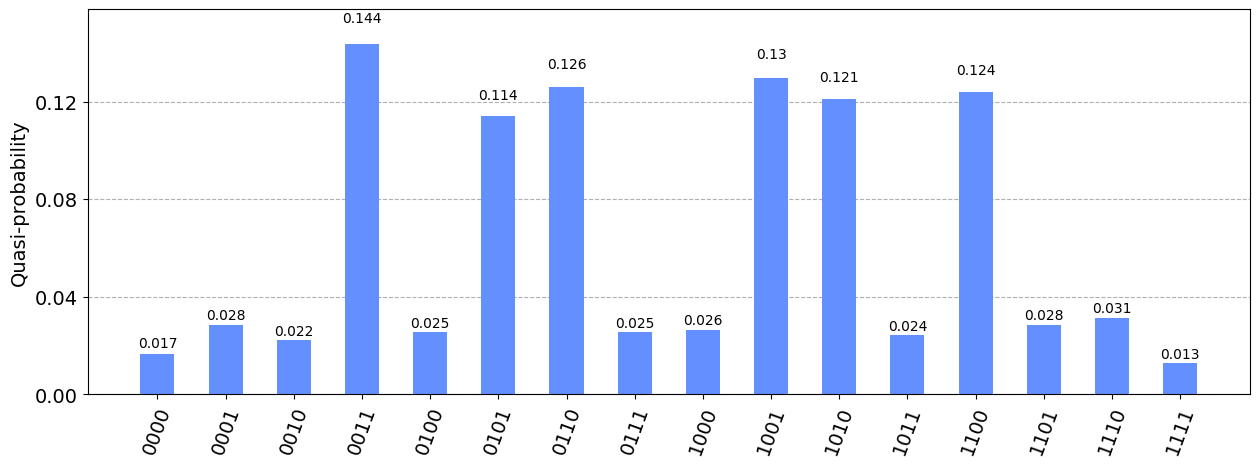

In [ ]:
plot_distribution(samp_dist.binary_probabilities(), figsize=(15, 5))

In [ ]:
# get best measurement
keys, values = list(samp_dist.keys()), list(samp_dist.values())
opt_bitstring = bin(keys[np.argmax(values)])[2:].zfill(mu.shape[0])[::-1]

print("Optimal bitstring:", opt_bitstring)

Optimal bitstring: 1100
